# **Netflix Movies & TV Shows Analysis**

### - **Objective:-**

  - Analyze Netflix dataset to discover trends in content distribution, genres, and release years using Python, Pandas, Seaborn, Matplotlib, and SQL.
  
### - **Dataset Overview:-**
  - Source: Kaggle (Netflix Movies and TV Shows dataset)  
  - Rows: ~8800  
  - Columns: 12  
  - Contains details like type, director, cast, country, date_added, release_year, rating, duration, and genres.

In [1]:
import pandas as pd

In [2]:
#Load dataset
df = pd.read_csv("netflix_titles.csv")

#Quick look at first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Step 1 : Data Cleaning

In [6]:
# Drop duplicate rows
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(8807, 12)

In [8]:
# Remove any extra spaces in column names:
df.columns = df.columns.str.strip()
df.columns  # check updated column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
# Converting date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [11]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [12]:
# Handle missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
# Extract primary genre (taking the first genre from multiple genres from each row)
df['listed_in'] = df['listed_in'].fillna("Unknown")
df['primary_genre'] = df['listed_in'].apply(lambda x : x.split(", ")[0].strip())

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,primary_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows


In [15]:
# Extracting numeric duration (separating number and type for example: 2 Seasons - 2, Season)
import re
import numpy as np

def extract_duration(s):
    if pd.isnull(s):
        return np.nan, np.nan
    m = re.search(r'(\d+)', str(s))
    num = int(m.group(1)) if m else np.nan
    kind = 'Season' if 'Season' in str(s) else ('Minute' if 'min' in str(s) else np.nan)
    return num, kind

df[['duration_num','duration_kind']] = df['duration'].apply(lambda x: pd.Series(extract_duration(x)))


In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,primary_genre,duration_num,duration_kind
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,90.0,Minute
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,2.0,Season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries,1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,2.0,Season


# Step 2 : EDA - Exploratory Data Analysis

In [17]:
# Patterns and Insights
import matplotlib.pyplot as plt

### 1. Count of Movies vs TV Shows

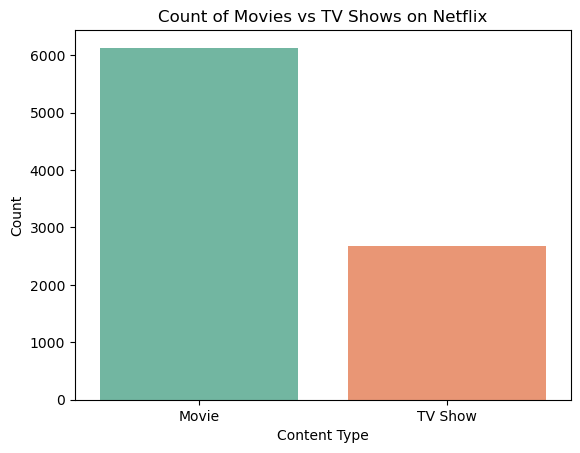

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'type', hue = 'type', data = df, palette = 'Set2', legend = False)
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

$\Rightarrow$ Netflix has many more Movies than TV Shows!

### 2. Content Added over Time

Text(0, 0.5, 'Number of Titles Added')

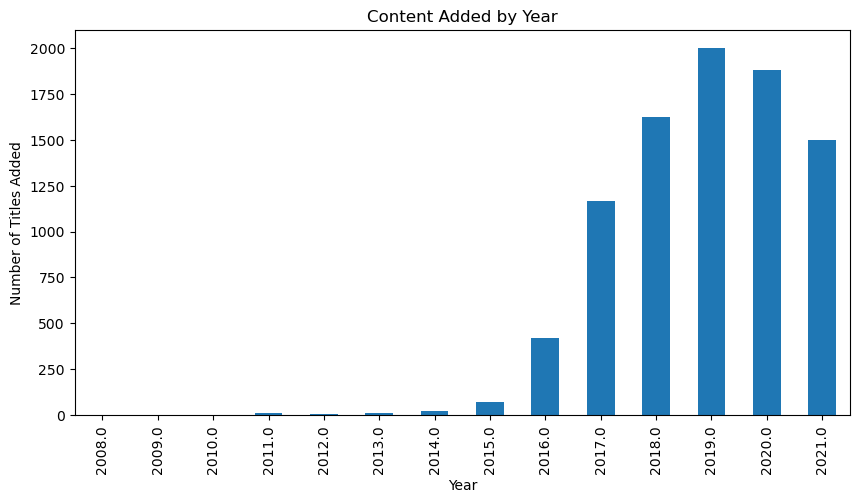

In [19]:
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind = 'bar', figsize = (10, 5))
plt.title("Content Added by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")

$\Rightarrow$ After 2015, Netflix started adding content much faster!

### 3. Top 10 Genres

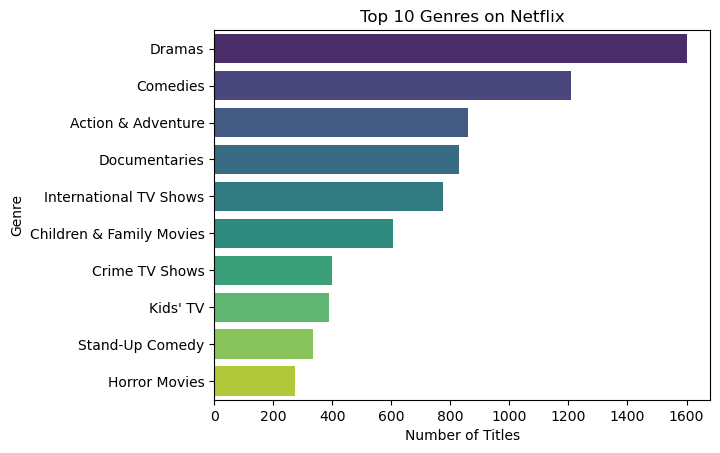

In [20]:
top_genres = df['primary_genre'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, hue = top_genres.index, palette='viridis', legend = False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

$\Rightarrow$ Genres like Drama, Comedy, Action & Adventure dominate Netflix!

### 4. Country-wise Content

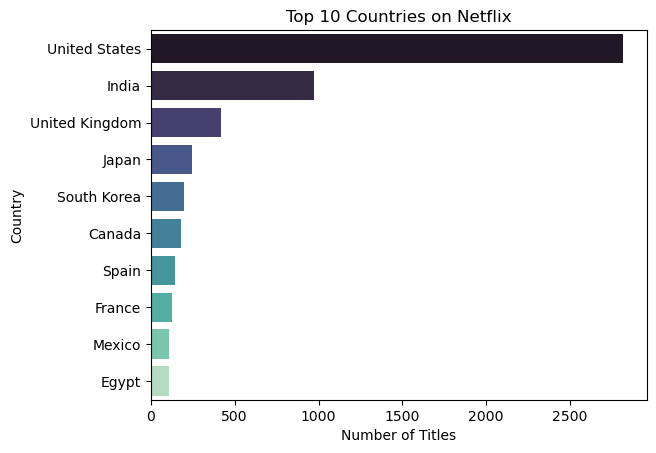

In [21]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x = top_countries.values, y = top_countries.index, hue=top_countries.index, palette = 'mako', legend=False)
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

$\Rightarrow$ US, India and UK are the top producers on Netflix!

### 5. Duration Analysis

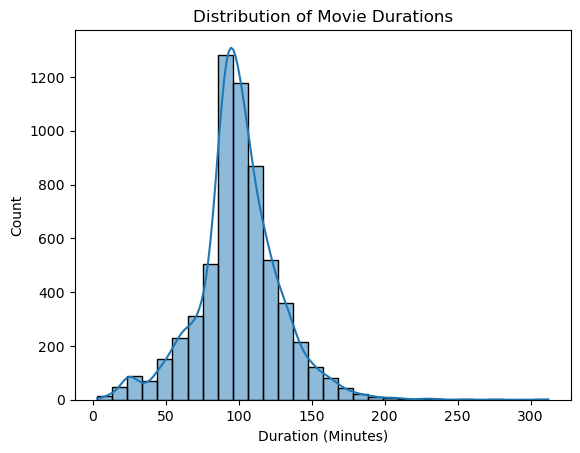

In [22]:
# Movies: duration in minutes
movies = df[df['type'] == 'Movie']
sns.histplot(movies['duration_num'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.show()

$\Rightarrow$ Most movies are around 90-120 minutes.

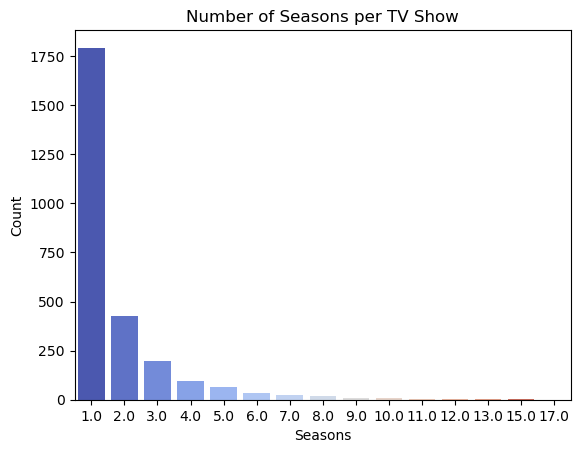

In [23]:
# TV Shows: number of seasons
tv_shows = df[df['type'] == 'TV Show']
sns.countplot(x='duration_num', data=tv_shows, hue='duration_num', palette='coolwarm', legend=False)
plt.title("Number of Seasons per TV Show")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

$\Rightarrow$ Most TV shows have 1-3 seasons.

# Step 3 : SQL Integration

In [24]:
import pandas as pd
from sqlalchemy import create_engine

In [25]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
# Create SQLAlchemy engine
engine = create_engine("sqlite:///netflix.db")

# Save dataframe into a SQL table called 'netflix'
df.to_sql("netflix", engine, if_exists="replace", index=False)


8807

In [27]:
query = "SELECT type, COUNT(*) AS Count FROM netflix GROUP BY type;"
pd.read_sql(query, engine)

,type,Count
0,Movie,6131
1,TV Show,2676


## SQL Analysis

### 1. Movies vs TV Shows

In [28]:
pd.read_sql("""
SELECT type, COUNT(*) AS Count
FROM netflix
GROUP BY type;
""", engine)

,type,Count
0,Movie,6131
1,TV Show,2676


$\Rightarrow$ Netflix has more Movies than TV Shows, showing Netflix's stronger focus on films.

### 2. Top 10 Countries with most titles

In [29]:
pd.read_sql("""
SELECT country, COUNT(*) as Count
FROM netflix
WHERE country IS NOT NULL
GROUP BY country
ORDER BY count DESC
LIMIT 10;
""", engine)

,country,Count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


$\Rightarrow$ United States dominates Netflix’s library, followed by India and other key regions.

### 3. Top 10 Genres

In [30]:
# Make sure primary_genre exists
df['listed_in'] = df['listed_in'].fillna('Unknown')
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())

# Save updated df to SQL
df.to_sql("netflix", engine, if_exists="replace", index=False)


8807

In [31]:
top_genres = pd.read_sql("""
SELECT primary_genre, COUNT(*) AS Count
FROM netflix
GROUP BY primary_genre
ORDER BY Count Desc
LIMIT 10;
""", engine)
top_genres

,primary_genre,Count
0,Dramas,1600
1,Comedies,1210
2,Action & Adventure,859
3,Documentaries,829
4,International TV Shows,774
5,Children & Family Movies,605
6,Crime TV Shows,399
7,Kids' TV,388
8,Stand-Up Comedy,334
9,Horror Movies,275


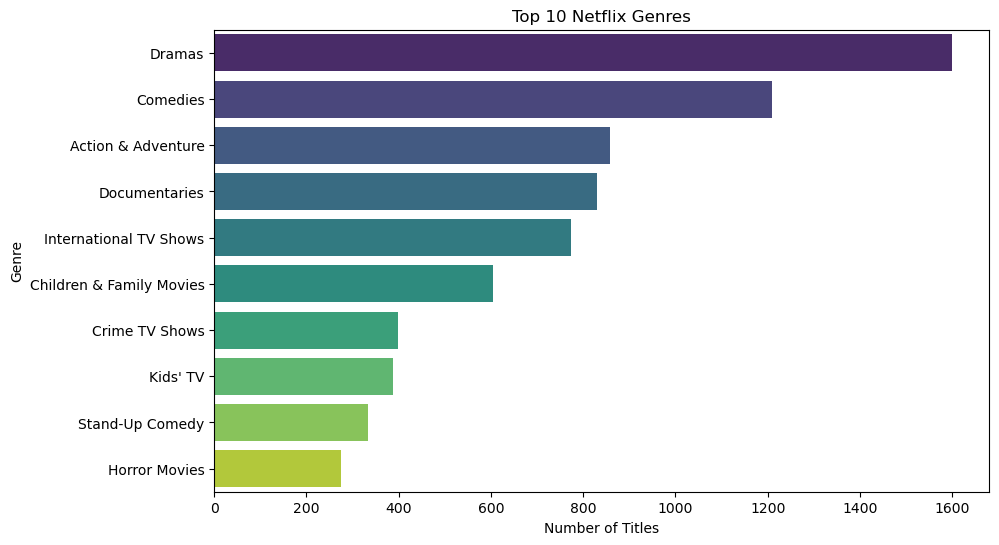

In [32]:
# Plotting a bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x="Count", y="primary_genre", palette="viridis", hue="primary_genre", dodge=False, legend=False)
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

$\Rightarrow$ Drama and Comedy are the most represented genres on Netflix.

### 4. Titles added per year

In [33]:
# Remove leading/trailing spaces
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.to_sql("netflix", engine, if_exists="replace", index=False)

8807

In [34]:
pd.read_sql("""
SELECT strftime('%Y', date_added) as year_added, COUNT(*) as count
FROM netflix
WHERE year_added IS NOT NULL
GROUP BY year_added
ORDER BY year_added;
""", engine)

,year_added,count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1188


$\Rightarrow$ Netflix saw a sharp growth in new titles added after 2015, reflecting its global expansion.

### 5. Movies longer than 2 hours

In [35]:
pd.read_sql("""
SELECT title, duration
FROM netflix
WHERE duration LIKE '%min%'
AND CAST(SUBSTR(duration, 1, INSTR(duration, ' ')-1) AS INTEGER) > 120;
""", engine)

,title,duration
0,Sankofa,125 min
1,Je Suis Karl,127 min
2,Avvai Shanmughi,161 min
3,Jeans,166 min
4,Minsara Kanavu,147 min
...,...,...
1137,Yamla Pagla Deewana 2,147 min
1138,Yanda Kartavya Aahe,151 min
1139,You Carry Me,157 min
1140,Zed Plus,131 min


$\Rightarrow$ Only a smaller share of Netflix movies exceed 120 minutes, as most are under 2 hours.

### 6. TV Shows more than 5 seasons

In [36]:
pd.read_sql("""
SELECT title, duration
FROM netflix
WHERE type='TV Show'
AND duration LIKE '%Season%'
AND CAST(SUBSTR(duration, 1, INSTR(duration, ' ')-1) AS INTEGER) > 5;
""", engine)

,title,duration
0,The Great British Baking Show,9 Seasons
1,Nailed It,6 Seasons
2,Numberblocks,6 Seasons
3,Saved by the Bell,9 Seasons
4,Lucifer,6 Seasons
...,...,...
94,The Andy Griffith Show,8 Seasons
95,The L Word,6 Seasons
96,The Office (U.S.),9 Seasons
97,The West Wing,7 Seasons


$\Rightarrow$ Very few Netflix TV shows run beyond 5 seasons, highlighting Netflix’s shorter series trend.